<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/Lab05/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilitatea secvenței de observații: 5.2460417850812225e-06
Cea mai probabilă secvență de dificultăți: ['Mediu', 'Usor', 'Dificil', 'Usor', 'Dificil', 'Usor', 'Dificil', 'Usor', 'Dificil']


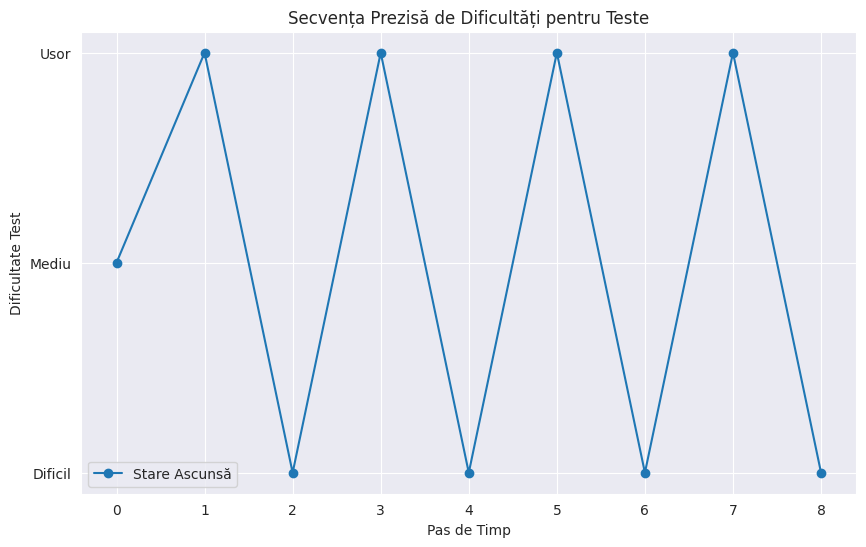

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

states = ["Dificil", "Mediu", "Usor"]
n_states = len(states)


observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

start_probability = np.array([1/3, 1/3, 1/3])

transition_probability = np.array([
    [0, 0.5, 0.5],
    [0.25, 0.25, 0.5],
    [0.5, 0.25, 0.25]
])

emission_probability = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1]
])


model = hmm.CategoricalHMM(n_components=n_states, init_params="")
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

observations_sequence = np.array([0, 0, 2, 1, 2, 1, 3, 1, 2]).reshape(-1, 1)

log_prob = model.score(observations_sequence)
probability = np.exp(log_prob)
print("Probabilitatea secvenței de observații:", probability)

hidden_states = model.predict(observations_sequence)
print("Cea mai probabilă secvență de dificultăți:", [states[i] for i in hidden_states])

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(hidden_states, '-o', label="Stare Ascunsă")
plt.xlabel("Pas de Timp")
plt.ylabel("Dificultate Test")
plt.yticks(ticks=range(n_states), labels=states)
plt.legend()
plt.title("Secvența Prezisă de Dificultăți pentru Teste")
plt.show()
